### Distance between preferred hospital to the a different hospital that needs the nurse.

In [ ]:
#distance between two hospitals (Example for a really bad distance match)
import math

def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in miles
    R = 3958.8

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Difference in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in miles
    distance = R * c

    return distance

# coordinates of Bethesda Hospital East and Orlando Regional Medical Center
lat1, lon1 = 26.5046724, -80.07016956595065 #Bethesda
lat2, lon2 = 28.52550115, -81.37826689467641 #Orlando Regional

# Calculate the distance
distance = haversine(lat1, lon1, lat2, lon2)
print(f"Distance between the two hospitals: {distance} miles")


Distance between the two hospitals: 160.9966840164623 miles


In [ ]:
#example of a good distance match

import math

def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in miles
    R = 3958.8

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Difference in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in miles
    distance = R * c

    return distance

# coordinates of West Boca Medical Center and Boca Raton Regional Hospital
lat1, lon1 = 26.35598085, -80.19909866957923 #West Boca Medical Center
lat2, lon2 = 26.358736399999998, -80.10189890615072 #Boca Raton Regional Hospital

# Calculate the distance
distance = haversine(lat1, lon1, lat2, lon2)
print(f"Distance between the two hospitals: {distance} miles")


Distance between the two hospitals: 6.020768824166736 miles


In [ ]:
#https://www.gps-coordinates.net/distance (straight line distance)

In [ ]:
pip install geopy


In [14]:
#working
import requests

def find_center_coordinates(place_name):
    # Replace spaces with '+' for URL encoding
    place_name_formatted = place_name.replace(' ', '+')
    url = f"https://nominatim.openstreetmap.org/search?q={place_name_formatted}&format=json"

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data:
            # Assuming the first returned result is the desired one
            latitude = data[0]['lat']
            longitude = data[0]['lon']
            return (latitude, longitude)
        else:
            return "Location not found."
    else:
        return "Failed to access geocoding service."

place_name = input("Enter the name of the place: ")
coordinates = find_center_coordinates(place_name)
print(f"Coordinates of {place_name}: {coordinates}")


Enter the name of the place: Florida Atlantic University
Coordinates of Florida Atlantic University: ('26.119403650000002', '-80.14169191096471')


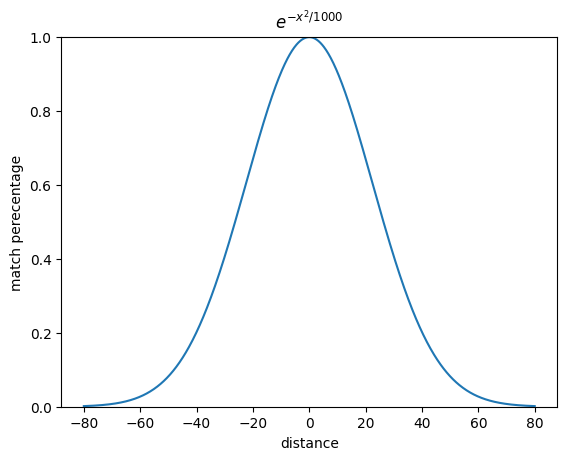

In [ ]:
#plotting the function e^((-x^2)/1000)
import numpy as np #for numerical operations
import matplotlib.pyplot as plt # to create plots

# the range of x values: from -6 to 6, with small steps for smoothness
x = np.linspace(-80, 80, 1000)

# y values using the function e^(-x^2)
y = np.exp((-x**2)/1000)

plt.ylim(0.0,1.0)
plt.plot(x, y) #plot x against y
plt.title('$e^{{-x^2}/1000}$') #plot title
plt.xlabel('distance') #labeling the x axis
plt.ylabel('match perecentage') #labeling the y axis
plt.show()

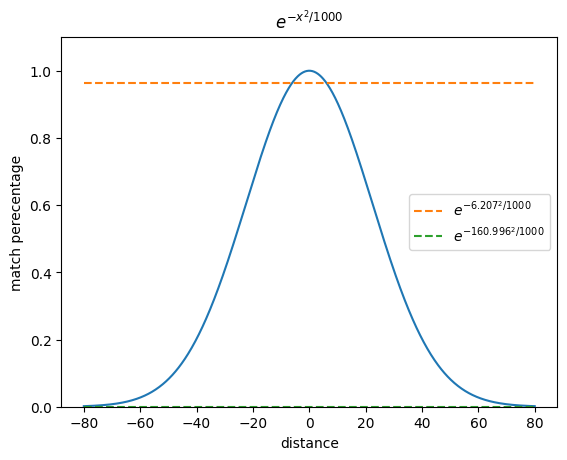

0.9622058701275953


5.53620418037578e-12

In [ ]:
#plotting the function e^((-x^2)/1000)
import numpy as np #for numerical operations
import matplotlib.pyplot as plt # to create plots

# the range of x values: from -6 to 6, with small steps for smoothness
x = np.linspace(-80, 80, 1000)

# y values using the function e^(-x^2)
y = np.exp((-x**2)/1000)
constant_value1 = np.exp((-6.207**2)/1000)
constant_value2 = np.exp(-160.996**2/1000)
plt.ylim(0.0,1.10)
plt.plot(x, y) #plot x against y

plt.plot(x, constant_value1 * np.ones_like(x), label='$e^{-6.207^2/1000}$', linestyle='--')
plt.plot(x, constant_value2 * np.ones_like(x), label='$e^{-160.996^2/1000}$', linestyle='--')

plt.title('$e^{{-x^2}/1000}$') #plot title
#plt.grid()
plt.xlabel('distance') #labeling the x axis
plt.ylabel('match perecentage') #labeling the y axis
plt.legend()
plt.show()

print(constant_value1)
constant_value2



In [ ]:
#trying to accomodate this code so that it would work in colab
import heapq  # Importing heapq to use a priority queue

# Reconstructs the path from the start to the current node
def reconstruct_path(cameFrom, current):
    total_path = [current]
    while current in cameFrom:
        current = cameFrom[current]
        total_path.insert(0, current)  # Prepend operation
    return total_path

# The A* search algorithm
def A_Star(start, goal, h, graph):
    openSet = []  # This will be our priority queue (min-heap)
    heapq.heappush(openSet, (h(start), start))  # Push the start node with its heuristic as priority

    cameFrom = {}  # Stores the best path to a node found so far

    gScore = {node: float('inf') for node in graph}  # Default all gScores to infinity
    gScore[start] = 0  # The cost from start to start is 0

    fScore = {node: float('inf') for node in graph}  # Default all fScores to infinity
    fScore[start] = h(start)  # For the first node, fScore is completely heuristic.

    openSetHash = {start}  # To quickly check if a node is in the open set

    while openSet:
        _, current = heapq.heappop(openSet)  # Pop the node with the lowest fScore
        openSetHash.remove(current)

        if current == goal:
            return reconstruct_path(cameFrom, current)

        for neighbor, d in graph[current].items():
            tentative_gScore = gScore[current] + d
            if tentative_gScore < gScore[neighbor]:
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = tentative_gScore + h(neighbor)
                if neighbor not in openSetHash:
                    heapq.heappush(openSet, (fScore[neighbor], neighbor))
                    openSetHash.add(neighbor)

    return None  # Return None if there is no path

# Example graph represented as a dictionary
graph = {
    'start': {'A': 1, 'B': 4},
    'A': {'C': 1, 'start': 1},
    'B': {'D': 1, 'start': 4},
    'C': {'goal': 1, 'A': 1},
    'D': {'goal': 1, 'B': 1},
    'goal': {'C': 1, 'D': 1}
}

# Example heuristic function
def h(node):
    # Example heuristic values, in a real scenario, these should be estimated costs to reach the goal
    heuristics = {'start': 10, 'A': 8, 'B': 2, 'C': 2, 'D': 3, 'goal': 0}
    return heuristics[node]

# Run the A* algorithm
path = A_Star('start', 'goal', h, graph)
print("Path from start to goal:", path)


Path from start to goal: ['start', 'B', 'D', 'goal']


In [ ]:
#trying to accomodate this code so that it would work in colab
import heapq  # Importing heapq to use a priority queue

# Reconstructs the path from the start to the current node
def reconstruct_path(West Boca Medical Center, Boca Raton Regional Hospital):
    total_path = [Boca Raton Regional Hospital]
    while Boca Raton Regional Hospital in West Boca Medical Center:
        current = West Boca Medical Center[Boca Raton Regional Hospital]
        total_path.insert(0, current)  # Prepend operation
    return total_path

# The A* search algorithm
def A_Star(start, goal, h, graph):
    openSet = []  # This will be our priority queue (min-heap)
    heapq.heappush(openSet, (h(start), start))  # Push the start node with its heuristic as priority

    cameFrom = {}  # Stores the best path to a node found so far

    gScore = {node: float('inf') for node in graph}  # Default all gScores to infinity
    gScore[start] = 0  # The cost from start to start is 0

    fScore = {node: float('inf') for node in graph}  # Default all fScores to infinity
    fScore[start] = h(start)  # For the first node, fScore is completely heuristic.

    openSetHash = {start}  # To quickly check if a node is in the open set

    while openSet:
        _, current = heapq.heappop(openSet)  # Pop the node with the lowest fScore
        openSetHash.remove(current)

        if current == goal:
            return reconstruct_path(cameFrom, current)

        for neighbor, d in graph[current].items():
            tentative_gScore = gScore[current] + d
            if tentative_gScore < gScore[neighbor]:
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = tentative_gScore + h(neighbor)
                if neighbor not in openSetHash:
                    heapq.heappush(openSet, (fScore[neighbor], neighbor))
                    openSetHash.add(neighbor)

    return None  # Return None if there is no path

# Example graph represented as a dictionary
graph = {
    'start': {'A': 1, 'B': 4},
    'A': {'C': 1, 'start': 1},
    'B': {'D': 1, 'start': 4},
    'C': {'goal': 1, 'A': 1},
    'D': {'goal': 1, 'B': 1},
    'goal': {'C': 1, 'D': 1}
}

# Example heuristic function
def h(node):
    # Example heuristic values, in a real scenario, these should be estimated costs to reach the goal
    heuristics = {'start': 10, 'A': 8, 'B': 2, 'C': 2, 'D': 3, 'goal': 0}
    return heuristics[node]

# Run the A* algorithm
path = A_Star('start', 'goal', h, graph)
print("Path from start to goal:", path)

SyntaxError: invalid syntax (<ipython-input-22-e04e2bca3e7e>, line 5)

### please test the code using other hospitals.

In [ ]:
pip install osmnx --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 2.5 MB/s eta 0:00:00


### Driving Distance In Meters

In [ ]:
import osmnx as ox
import networkx as nx

# Ensure you're using the correct OSMnx version or update the code according to your version.
# If necessary, update OSMnx: pip install osmnx --upgrade

def get_shortest_path_by_road(hospital1_coords, hospital2_coords):
    # Specify the network type and the location
    G = ox.graph_from_point(((hospital1_coords[0] + hospital2_coords[0]) / 2,
                             (hospital1_coords[1] + hospital2_coords[1]) / 2),
                            dist=100000,  # Increased max size to 100 km for the bounding box
                            dist_type="bbox",
                            network_type="drive")

    # Find the nearest nodes in the road network to the hospital coordinates
    hospital1_node = ox.distance.nearest_nodes(G, X=hospital1_coords[1], Y=hospital1_coords[0])
    hospital2_node = ox.distance.nearest_nodes(G, X=hospital2_coords[1], Y=hospital2_coords[0])

    # Calculate the shortest path
    shortest_path_nodes = nx.shortest_path(G, hospital1_node, hospital2_node, weight='length')
    distance = sum(ox.utils_graph.get_route_edge_attributes(G, shortest_path_nodes, 'length'))

    # Plot the route
    route_map = ox.plot_route_folium(G, shortest_path_nodes)

    return distance, route_map

# Define the coordinates (latitude, longitude) of the hospitals
# Replace these example coordinates with the actual coordinates
hospital1_coords = (26.3795, -80.2070)  # Example coordinates for West Boca Medical Center
hospital2_coords = (26.3587, -80.0831)  # Example coordinates for Boca Raton Regional Hospital

# Calculate the distance
distance, route_map = get_shortest_path_by_road(hospital1_coords, hospital2_coords)
print(f"The shortest driving distance between the two hospitals is {distance} meters.")


The shortest driving distance between the two hospitals is 8498.808000000003 meters.


<ipython-input-14-d7d0fb7dcd2d>:17: FutureWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in the v2.0.0 release. Use the `route_to_gdf` function instead.
  distance = sum(ox.utils_graph.get_route_edge_attributes(G, shortest_path_nodes, 'length'))
<ipython-input-14-d7d0fb7dcd2d>:20: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  route_map = ox.plot_route_folium(G, shortest_path_nodes)


### Driving Distance in Miles

In [ ]:
import osmnx as ox
import networkx as nx

def get_shortest_path_by_road(hospital1_coords, hospital2_coords):
    # Specify the network type and the location
    G = ox.graph_from_point(((hospital1_coords[0] + hospital2_coords[0]) / 2,
                             (hospital1_coords[1] + hospital2_coords[1]) / 2),
                            dist=100000,  # Increased max size to 100 km for the bounding box
                            dist_type="bbox",
                            network_type="drive")
    hospital1_node = ox.distance.nearest_nodes(G, X=hospital1_coords[1], Y=hospital1_coords[0])
    hospital2_node = ox.distance.nearest_nodes(G, X=hospital2_coords[1], Y=hospital2_coords[0])

    shortest_path_nodes = nx.shortest_path(G, hospital1_node, hospital2_node, weight='length')
    distance_meters = sum(ox.utils_graph.get_route_edge_attributes(G, shortest_path_nodes, 'length'))

    # Convert distance from meters to miles
    distance_miles = distance_meters * 0.000621371

    route_map = ox.plot_route_folium(G, shortest_path_nodes)

    return distance_miles, route_map

# Define the coordinates (latitude, longitude) of the hospitals
hospital1_coords = (26.3795, -80.2070)  # Example coordinates for West Boca Medical Center
hospital2_coords = (26.3587, -80.0831)  # Example coordinates for Boca Raton Regional Hospital

# Calculate the distance
distance_miles, route_map = get_shortest_path_by_road(hospital1_coords, hospital2_coords)
print(f"The shortest driving distance between the two hospitals is {distance_miles} miles.")


ModuleNotFoundError: No module named 'osmnx'

In [ ]:
import osmnx as ox
import networkx as nx

def get_shortest_path_by_road(hospital1_coords, hospital2_coords):
    # Specify the network type and the location
    G = ox.graph_from_point(((hospital1_coords[0] + hospital2_coords[0]) / 2,
                             (hospital1_coords[1] + hospital2_coords[1]) / 2),
                            dist=1000000,  # Increased max size to 100 km for the bounding box
                            dist_type="bbox",
                            network_type="drive")
    hospital1_node = ox.distance.nearest_nodes(G, X=hospital1_coords[1], Y=hospital1_coords[0])
    hospital2_node = ox.distance.nearest_nodes(G, X=hospital2_coords[1], Y=hospital2_coords[0])

    shortest_path_nodes = nx.shortest_path(G, hospital1_node, hospital2_node, weight='length')
    distance_meters = sum(ox.utils_graph.get_route_edge_attributes(G, shortest_path_nodes, 'length'))

    # Convert distance from meters to miles
    distance_miles = distance_meters * 0.000621371

    route_map = ox.plot_route_folium(G, shortest_path_nodes)

    return distance_miles, route_map

# Define the coordinates (latitude, longitude) of the hospitals
hospital1_coords = (26.5046724, -80.07016956595065)  # Example coordinates for Bethesda Hospital East
hospital2_coords = (28.52550115, -81.37826689467641)  # Example coordinates for Orlando Regional Medical Center

# Calculate the distance
distance_miles, route_map = get_shortest_path_by_road(hospital1_coords, hospital2_coords)
print(f"The shortest driving distance between the two hospitals is {distance_miles} miles.")


/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:211: UserWarning: This area is 1,597 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


KeyboardInterrupt: 

In [ ]:
import osmnx as ox
import networkx as nx

def get_shortest_path_by_road(hospital1_coords, hospital2_coords):
    # For a large distance between cities, it might be more effective to specify a larger network
    # This example directly uses coordinates without specifying an encompassing area
    G = ox.graph_from_point(((hospital1_coords[0] + hospital2_coords[0]) / 2,
                             (hospital1_coords[1] + hospital2_coords[1]) / 2),
                            dist=500000, dist_type="bbox", network_type="drive")

    hospital1_node = ox.distance.nearest_nodes(G, X=hospital1_coords[1], Y=hospital1_coords[0])
    hospital2_node = ox.distance.nearest_nodes(G, X=hospital2_coords[1], Y=hospital2_coords[0])

    shortest_path_nodes = nx.shortest_path(G, hospital1_node, hospital2_node, weight='length')
    distance_meters = sum(ox.utils_graph.get_route_edge_attributes(G, shortest_path_nodes, 'length'))

    # Convert distance from meters to miles
    distance_miles = distance_meters * 0.000621371

    route_map = ox.plot_route_folium(G, shortest_path_nodes)

    return distance_miles, route_map

# Define the coordinates of the hospitals
bethesda_hospital_coords = (26.525349, -80.060387)  # Replace with actual coordinates
orlando_regional_medical_center_coords = (28.526587, -81.379236)  # Replace with actual coordinates

# Calculate the distance
distance_miles, route_map = get_shortest_path_by_road(bethesda_hospital_coords, orlando_regional_medical_center_coords)
print(f"The shortest driving distance between Bethesda Hospital East and Orlando Regional Medical Center is {distance_miles} miles.")


ModuleNotFoundError: No module named 'osmnx'

In [ ]:
from queue import PriorityQueue

def reconstruct_path(cameFrom, current):
    total_path = [current]
    while current in cameFrom:
        current = cameFrom[current]
        total_path.insert(0, current)  # Prepend to the path
    return total_path

def A_Star(start, goal, h, graph, d):
    openSet = PriorityQueue()
    openSet.put((0, start))  # Priority queue with (fScore, node)

    cameFrom = {}

    gScore = {node: float('inf') for node in graph}
    gScore[start] = 0

    fScore = {node: float('inf') for node in graph}
    fScore[start] = h(start)

    openSetHash = {start}  # To keep track of items in PriorityQueue

    while not openSet.empty():
        current = openSet.get()[1]  # Get the node with the lowest fScore
        openSetHash.remove(current)

        if current == goal:
            return reconstruct_path(cameFrom, current)

        for neighbor in graph[current]:
            tentative_gScore = gScore[current] + d(current, neighbor)
            if tentative_gScore < gScore[neighbor]:
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = tentative_gScore + h(neighbor)
                if neighbor not in openSetHash:
                    openSet.put((fScore[neighbor], neighbor))
                    openSetHash.add(neighbor)

    return None  # If the goal was not reached

# Example usage
if __name__ == "__main__":
    # Define a simple graph as a dictionary
    # For example purposes, d() and h() functions are very basic and might need to be adapted
    graph = {
        'start': {'A': 1, 'B': 4},
        'A': {'goal': 1},
        'B': {'goal': 2},
        'goal': {}
    }

    def h(node):
        # Simple heuristic function
        return {'start': 3, 'A': 1, 'B': 2, 'goal': 0}.get(node, 0)

    def d(node1, node2):
        # Distance between two nodes
        return graph[node1].get(node2, float('inf'))

    start = 'start'
    goal = 'goal'

    path = A_Star(start, goal, h, graph, d)
    print("Path:", path)


Path: ['start', 'A', 'goal']


In [ ]:
import math

# Placeholder graph definition (not applicable for direct coordinate usage)
graph = {'start': {'goal': 0}}  # Not used in this heuristic distance calculation

# Coordinates for the hospitals
hospital1_coords = (26.5046724, -80.07016956595065)  # Bethesda Hospital East
hospital2_coords = (28.52550115, -81.37826689467641)  # Orlando Regional Medical Center

# Heuristic function calculating straight-line distance between two points on Earth
def haversine(coord1, coord2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1 = map(math.radians, coord1)
    lat2, lon2 = map(math.radians, coord2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))

    # Radius of Earth in kilometers. Use 3956 for miles
    r = 6371

    return c * r

# Adjusting the heuristic function to use haversine distance
def h(node):
    # Assuming 'start' corresponds to hospital1 and 'goal' to hospital2
    if node == 'start':
        return haversine(hospital1_coords, hospital2_coords)
    elif node == 'goal':
        return 0
    return float('inf')

# Distance function (not applicable for direct coordinate usage in this context)
def d(node1, node2):
    # This function is not used in this context
    return float('inf')

# Dummy start and goal for the sake of example
start = 'start'
goal = 'goal'

# Since we don't have a graph to navigate, we'll just print the heuristic distance
distance = h(start)
print(f"Estimated straight-line distance: {distance} km")


Estimated straight-line distance: 259.0961589039308 km


In [ ]:
import osmnx as ox
import networkx as nx
from geopy.distance import great_circle

def h(node1, node2, node_data):
    # Heuristic function based on straight-line distance
    coord1 = node_data[node1]['y'], node_data[node1]['x']
    coord2 = node_data[node2]['y'], node_data[node2]['x']
    return great_circle(coord1, coord2).miles

def a_star_search(graph, start_point, end_point, node_data):
    # Wrapper for nx.astar_path to use the great_circle heuristic
    path = nx.astar_path(graph, start_point, end_point,
                         heuristic=lambda a, b: h(a, b, node_data),
                         weight='length')
    return path

# Fetch the road network
G = ox.graph_from_place('Orlando, Florida, USA', network_type='drive')
node_data = {node: data for node, data in G.nodes(data=True)}

# Geocode the hospitals
hospital1_location = ox.geocoder.geocode('Bethesda Hospital East, Boynton Beach, Florida')
hospital2_location = ox.geocoder.geocode('Orlando Regional Medical Center, Orlando, Florida')

# Find the nearest nodes
hospital1_node = ox.distance.nearest_nodes(G, X=hospital1_location[1], Y=hospital1_location[0])
hospital2_node = ox.distance.nearest_nodes(G, X=hospital2_location[1], Y=hospital2_location[0])

# Find the shortest path
path = a_star_search(G, hospital1_node, hospital2_node, node_data)

# Calculate the total path distance
distance = sum(ox.utils_graph.get_route_edge_attributes(G, path, 'length')) / 1609.34  # Convert meters to miles

print(f"The shortest driving distance between the hospitals is approximately {distance:.2f} miles.")


NetworkXNoPath: Node 99626155 not reachable from 4619022321

In [ ]:
import matplotlib.pyplot as plt
class QuadTree:
    def __init__(self, boundary):
        self.boundary = boundary  # Boundary is a dictionary with x, y, width, height
        self.points = []  # List to hold hospitals within this quad
        self.nw = self.ne = self.sw = self.se = None  # Child quads

    def insert(self, point):
        # Insert a point if it's within the boundary
        if (point['x'] >= self.boundary['x'] and point['x'] <= self.boundary['x'] + self.boundary['width'] and
            point['y'] >= self.boundary['y'] and point['y'] <= self.boundary['y'] + self.boundary['height']):
            self.points.append(point)
            return True
        return False

    def subdivide(self):
        # Subdivide the quad into four child quads
        half_width = self.boundary['width'] / 2
        half_height = self.boundary['height'] / 2
        cx = self.boundary['x']
        cy = self.boundary['y']

        self.nw = QuadTree({'x': cx, 'y': cy, 'width': half_width, 'height': half_height})
        self.ne = QuadTree({'x': cx + half_width, 'y': cy, 'width': half_width, 'height': half_height})
        self.sw = QuadTree({'x': cx, 'y': cy + half_height, 'width': half_width, 'height': half_height})
        self.se = QuadTree({'x': cx + half_width, 'y': cy + half_height, 'width': half_width, 'height': half_height})

# Example use
boundary = {'x': -80.1, 'y': 26.35, 'width': 0.1, 'height': 0.1}  # Define boundary covering Boca Raton area
boca_quad_tree = QuadTree(boundary)

# Example hospital data
hospitals = [
    {'x': -80.087, 'y': 26.358, 'name': "Boca Raton Regional Hospital"},
    {'x': -80.092, 'y': 26.351, 'name': "West Boca Medical Center"}
    # Add more hospitals as needed
]

# Insert hospitals into the QuadTree
for hospital in hospitals:
    boca_quad_tree.insert(hospital)
plt.show
# At this point, 'boca_quad_tree' contains the hospitals within its boundary


<function matplotlib.pyplot.show(close=None, block=None)>

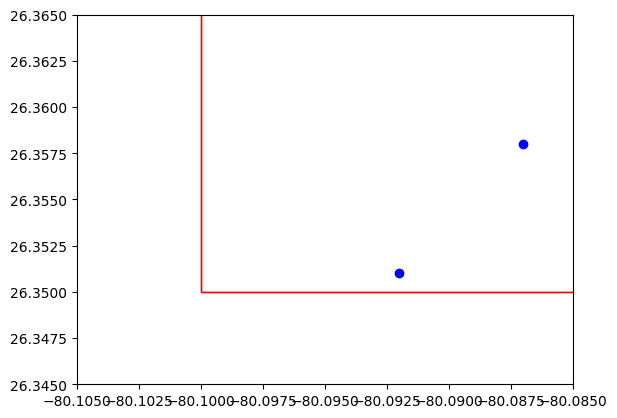

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class QuadTree:
    def __init__(self, boundary, depth=0):
        self.boundary = boundary
        self.points = []
        self.nw = self.ne = self.sw = self.se = None
        self.depth = depth  # Added to keep track of the depth for coloring

    def insert(self, point):
        if (point['x'] >= self.boundary['x'] and point['x'] <= self.boundary['x'] + self.boundary['width'] and
            point['y'] >= self.boundary['y'] and point['y'] <= self.boundary['y'] + self.boundary['height']):
            self.points.append(point)
            return True
        return False

    def subdivide(self):
        half_width = self.boundary['width'] / 2
        half_height = self.boundary['height'] / 2
        cx = self.boundary['x']
        cy = self.boundary['y']

        self.nw = QuadTree({'x': cx, 'y': cy, 'width': half_width, 'height': half_height}, self.depth + 1)
        self.ne = QuadTree({'x': cx + half_width, 'y': cy, 'width': half_width, 'height': half_height}, self.depth + 1)
        self.sw = QuadTree({'x': cx, 'y': cy + half_height, 'width': half_width, 'height': half_height}, self.depth + 1)
        self.se = QuadTree({'x': cx + half_width, 'y': cy + half_height, 'width': half_width, 'height': half_height}, self.depth + 1)

    def plot(self, ax):
        # Draw the boundary of the quad
        rect = patches.Rectangle((self.boundary['x'], self.boundary['y']), self.boundary['width'], self.boundary['height'],
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Plot the points
        for point in self.points:
            ax.plot(point['x'], point['y'], 'bo')

        # Recursively plot child quads
        if self.nw: self.nw.plot(ax)
        if self.ne: self.ne.plot(ax)
        if self.sw: self.sw.plot(ax)
        if self.se: self.se.plot(ax)

# Initialize the QuadTree with a boundary
boundary = {'x': -80.1, 'y': 26.35, 'width': 0.1, 'height': 0.1}
boca_quad_tree = QuadTree(boundary)

# Insert hospitals (example data)
hospitals = [
    {'x': -80.087, 'y': 26.358, 'name': "Boca Raton Regional Hospital"},
    {'x': -80.092, 'y': 26.351, 'name': "West Boca Medical Center"},
    {'x': -80.142 ,'y':26.119, 'name': "Florida Atlantic University"}
 ]
for hospital in hospitals:
    boca_quad_tree.insert(hospital)

# Subdivide the QuadTree for demonstration (would normally be conditional based on point density)
boca_quad_tree.subdivide()

# Plotting
fig, ax = plt.subplots()
boca_quad_tree.plot(ax)
ax.set_xlim(-80.105, -80.085)
ax.set_ylim(26.345, 26.365)

plt.show()


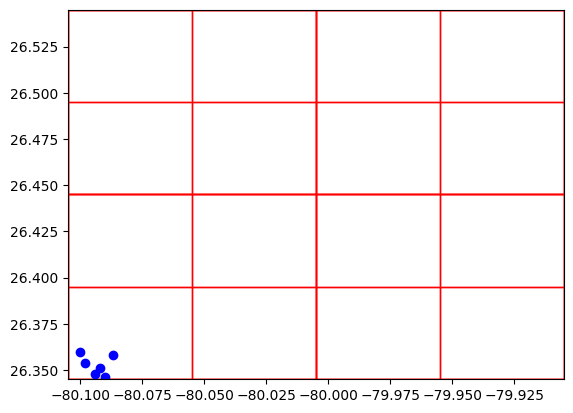

In [24]:
# Assuming the QuadTree class definition from the previous example remains unchanged

# Initialize the QuadTree with a broader boundary if needed
boundary = {'x': -80.105, 'y': 26.345, 'width': 0.2, 'height': 0.2}
boca_quad_tree = QuadTree(boundary)

# Insert more hospitals (example data)
hospitals = [
    {'x': -80.087, 'y': 26.358, 'name': "Boca Raton Regional Hospital"},
    {'x': -80.092, 'y': 26.351, 'name': "West Boca Medical Center"},
    # Adding more example hospital locations within the specified boundary
    {'x': -80.094, 'y': 26.348, 'name': "Boca Raton Community Hospital"},
    {'x': -80.100, 'y': 26.360, 'name': "Delray Medical Center"},
    {'x': -80.098, 'y': 26.354, 'name': "FAU Health Services"},
    {'x': -80.090, 'y': 26.346, 'name': "Lynn Cancer Institute"}
]

# Insert all hospitals into the QuadTree
for hospital in hospitals:
    boca_quad_tree.insert(hospital)

# Optionally, subdivide the QuadTree based on the density of points.
# For demonstration, we're manually subdividing the root and its children once.
# In a full implementation, subdivision would be automatic based on a threshold of points.
boca_quad_tree.subdivide()  # Subdivide the root quad
for child in [boca_quad_tree.nw, boca_quad_tree.ne, boca_quad_tree.sw, boca_quad_tree.se]:
    child.subdivide()  # Further subdivide each child

# Plotting the QuadTree with all points
fig, ax = plt.subplots()
boca_quad_tree.plot(ax)
ax.set_xlim(boundary['x'], boundary['x'] + boundary['width'])
ax.set_ylim(boundary['y'], boundary['y'] + boundary['height'])
plt.show()


QuadTree test


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class QuadTree:
    def __init__(self, boundary, depth=0):
        self.boundary = boundary
        self.points = []
        self.nw = self.ne = self.sw = self.se = None
        self.depth = depth  # Added to keep track of the depth for coloring

    def insert(self, point):
        if (point['x'] >= self.boundary['x'] and point['x'] <= self.boundary['x'] + self.boundary['width'] and
            point['y'] >= self.boundary['y'] and point['y'] <= self.boundary['y'] + self.boundary['height']):
            self.points.append(point)
            return True
        return False

    def subdivide(self):
        half_width = self.boundary['width'] / 2
        half_height = self.boundary['height'] / 2
        cx = self.boundary['x']
        cy = self.boundary['y']

        self.nw = QuadTree({'x': cx, 'y': cy, 'width': half_width, 'height': half_height}, self.depth + 1)
        self.ne = QuadTree({'x': cx + half_width, 'y': cy, 'width': half_width, 'height': half_height}, self.depth + 1)
        self.sw = QuadTree({'x': cx, 'y': cy + half_height, 'width': half_width, 'height': half_height}, self.depth + 1)
        self.se = QuadTree({'x': cx + half_width, 'y': cy + half_height, 'width': half_width, 'height': half_height}, self.depth + 1)

    def plot(self, ax):
        # Draw the boundary of the quad
        rect = patches.Rectangle((self.boundary['x'], self.boundary['y']), self.boundary['width'], self.boundary['height'],
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Plot the points
        for point in self.points:
            ax.plot(point['x'], point['y'], 'bo')

        # Recursively plot child quads
        if self.nw: self.nw.plot(ax)
        if self.ne: self.ne.plot(ax)
        if self.sw: self.sw.plot(ax)
        if self.se: self.se.plot(ax)

# Initialize the QuadTree with a boundary
boundary = {'x': -80.1, 'y': 26.35, 'width': 0.1, 'height': 0.1}
boca_quad_tree = QuadTree(boundary)

# Insert hospitals (example data)
hospitals = [
    {'x': -80.087, 'y': 26.358, 'name': "Boca Raton Regional Hospital"},
    {'x': -80.092, 'y': 26.351, 'name': "West Boca Medical Center"}
]

for hospital in hospitals:
    boca_quad_tree.insert(hospital)

# Subdivide the QuadTree for demonstration (would normally be conditional based on point density)
boca_quad_tree.subdivide()

# Plotting
fig, ax = plt.subplots()
boca_quad_tree.plot(ax)
ax.set_xlim(-80.105, -80.085)
ax.set_ylim(26.345, 26.365)
plt.show()


In [27]:
#marco sam lab code (using A star/ demonstrating it)
import heapq
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(coord1, coord2):
    # Radius of the Earth
    R = 6371.0

    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula...i hope
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

def astar(graph, start, end):
    pq = [(0, start)]

    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0

    while pq:
        current_distance, current_vertex = heapq.heappop(pq)

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances[end]

# Define the graph as a dictionary of coordinates and their neighbors with distances
# If you need gpt's help with this, then ask for a basic map, especially if the points are between a staright road like i95
# An example prompt: "how can I go about using a basic map of fau to go from fau stadium to fau theatre?"
graph = {
    (26.369148, -80.101501): {(26.373798, -80.101921): haversine_distance((26.369148, -80.101501), (26.373798, -80.101921))},
    (26.373798, -80.101921): {(26.375, -80.102): haversine_distance((26.373798, -80.101921), (26.375, -80.102)),
                              (26.377, -80.1): haversine_distance((26.373798, -80.101921), (26.377, -80.1))},
    (26.375, -80.102): {(26.377, -80.1): haversine_distance((26.375, -80.102), (26.377, -80.1))},
    (26.377, -80.1): {},
}

# imma do the stadium and theatre since i forgot the actual places and cuz easy check to make sure it works
# FAU Stadium
start = ((26.369148, -80.101501), "FAU Stadium")
# FAU Theatre
end = ((26.377, -80.1), "FAU Theatre")

shortest_distance = astar(graph, start[0], end[0])

shortest_distance_miles = shortest_distance * 0.621371

print(f"The shortest distance from {start[1]} to {end[1]} is {shortest_distance_miles} miles.")


The shortest distance from FAU Stadium to FAU Theatre is 0.5735027048590682 miles.
